## Perceptron Logical Gates

In this notebook we train a perceptron (just a single neuron) to solve logical gates. 

That means, e.g. for the AND gate, if we put in a 0 and a 1, the perceptron should output 0. It should only output 1 if the input was (1,1).

For the XOR gate, the Perceptron should return 1 if only one of the inputs was 1 and the other one 0 -->  (0,1) or (1,0). For (0,0) and (1,1) it should return 0.

And so on...

In [18]:
# Not using any tf libraries so far...
import numpy as np 

In [19]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

#### Implement Perceptron.

In [20]:
# To make you familiar with classes we will implement the perceptron as a class.
# Check https://docs.python.org/3/tutorial/classes.html if you need basic help with python classes.

class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 0.01.
        self.alpha = 0.01
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        weighted_sum =  self.weights @ input + self.bias 
        # An alternative would be:
        # weighted_sum =  np.dot(input, self.weights) + self.bias

        # 2. Return a 1 or a 0, depending on whether the perceptron surpassed the threshold. 
        # You can use 'int(...)' to make an integer out of a boolean.
        return int(weighted_sum >= 0)
        
    def training_step(self, input, label):
        # Perform a whole training step (including the forward step).
        # 1. Forward step.
        prediction = self.forward_step(input)
        # 2. Calculate the weight updates.
        delta_weights = self.alpha * (label - prediction) * input
        # 3. Calculate the bias update. We consider 1 as the "input" to the bias, so that we can treat it just like the other weights.
        delta_bias = self.alpha * (label - prediction) * 1
        # 4. Update weights and bias.
        self.weights += delta_weights
        self.bias += delta_bias


Note that we are **adding** the weights/biases, because we are using the Perceptron Learning rule and **not Gradient Descent**!

#### Perceptron Learning Rule Recap:
$$w_i^{new} = w_i^{old} + \Delta w_i  $$
$$\Delta w_i = \alpha*  (t-y) *x_i $$

#### Train on AND gate.

In [21]:
# Now let's train the perceptron.

# Choose which target you want to train on.
t = t_and
# Initialize a perceptron.
perceptron = Perceptron(2)
# Initialize lists to store steps and performance.
steps = []
accuracies = []

# We train for 500 steps.
for i in range(500):
    steps.append(i)
    
    # 1. Draw a random sample from x and the corresponding t. Check 'np.random.randint'.
    index = np.random.randint(len(x))
    sample = x[index]
    label = t[index]
    # 2. Perform a training step.
    perceptron.training_step(sample, label)
    
    # Calculate the performance over all four possible inputs.
    accuracy_sum = 0
    for k in range(len(x)):
        output = perceptron.forward_step(x[k])   # feed each input to the perceptron (only foward step!)
        accuracy_sum += int(output == t[k])  # this turns true if the perceptron gave the right output --> then adds 1 
    accuracy = accuracy_sum / 4                  # we divide through all the training examples
    accuracies.append(accuracy)

#### Let's give it a try:


In [22]:
for n in range(len(x)):
  output = perceptron.forward_step(x[n])
  print("Input: %s \t True Label: %d \t Perceptron's Prediction: %d" % (np.array2string(x[n]), t[n], output))


Input: [0 0] 	 True Label: 0 	 Perceptron's Prediction: 0
Input: [0 1] 	 True Label: 0 	 Perceptron's Prediction: 0
Input: [1 0] 	 True Label: 0 	 Perceptron's Prediction: 0
Input: [1 1] 	 True Label: 1 	 Perceptron's Prediction: 1


#### Visualize training progress.

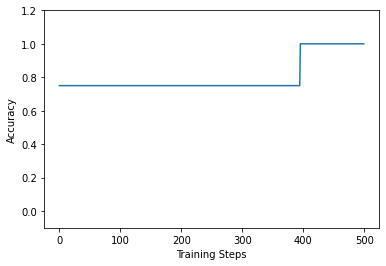

In [23]:
# Lastly let's plot the training progress.
import matplotlib.pyplot as plt
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#### Train on XOR gate.

In [24]:
# Initialize a perceptron.
perceptron = Perceptron(2)
# Initialize list to store performance.
accuracies = []
steps =[]

# We train for 500 steps.
for i in range(500):
    steps.append(i)
    
    # 1. Draw a random sample from x and the corresponding t. Check 'np.random.randint'.
    index = np.random.randint(len(x))
    sample = x[index]
    label = t_xor[index]
    # 2. Perform a training step.
    perceptron.training_step(sample, label)
    
    # Calculate the performance over all four possible inputs.
    accuracy_sum = 0
    for k in range(4):
        output = perceptron.forward_step(x[k])   # feed each input to the perceptron (only foward step!)
        accuracy_sum += int(output == t_xor[k])  # this turns true if the perceptron gave the right output --> then adds 1 
    accuracy = accuracy_sum / 4                  # we divide through all the training examples
    accuracies.append(accuracy)

#### Visualize training progress.

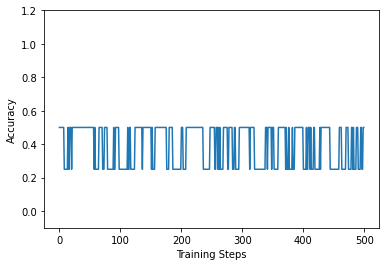

In [25]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()